In [ ]:
import requests

print('Beginning file download with requests')

url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3486/31310/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589135856&Signature=Cy0Qp%2Fed5ixwIUCFGAI5hhSYqpiV%2FpKLOXOtwwB%2B4ZlqhYoadU4M%2FtV%2BsEClALQwzhC3fqr0H7%2FWhKKfVzrPFk4FfhBLWxOJqRnb3aprD0JuAFLWrrL0rOtZvMtOtqU1Z36mYHVSRtWtgY3N6JIi%2F1eGfKuZaJ%2B06%2B9eOTHdLChfViDNvoFyKEsFqp0b1WhlX0WS2s04lWh0%2F7QGeiTlgoAtDfpW8dhflinPtX%2Fm7rEtPp%2Fj62GpuTlfGvH%2F%2FA%2BeZArQw8Zevr6uLW%2FbNnFA05R8kQqZIaEZ5foXfMJjdkLTVdfugpDOPXXkauguCjhpqxhcCtvSiZLxNFoyZ7x0xQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dfacial-keypoints-detection.zip'
r = requests.get(url)

with open('data.zip', 'wb') as f:
    f.write(r.content)

# Retrieve HTTP meta-data
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

Beginning file download with requests
200
application/zip
None


In [ ]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content')

In [ ]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/training.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content')

In [ ]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('/content/test.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('/content')

# **Increment 1**


Count the null value in the train data: 
count       31
unique       2
top       True
freq        28
dtype: object

After dropping the null value, Count the null value in the train data: 
count        31
unique        1
top       False
freq         31
dtype: object

Count the null value in the test data: 
count         2
unique        1
top       False
freq          2
dtype: object

Count the null value in the ID Lookup Table: 
count         4
unique        2
top       False
freq          3
dtype: object
The shape of train data :  (7049, 31)
The shape of test data :  (1783, 2)
   left_eye_center_x  ...                                              Image
0          66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1          64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2          65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3          65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4          66.725301  ...  147

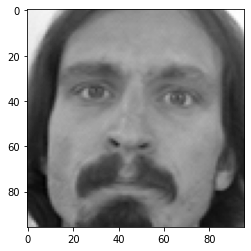

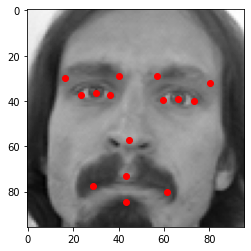

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid


# define the show_facial_keypoints function
def show_facial_keypoints(images, keypoints, index):
    facial_keypoints = plt.imshow(images[index], cmap='gray')
    for i in range(15):
        plt.plot(keypoints.loc[index][2 * i], keypoints.loc[index][2 * i + 1], 'ro')
    return facial_keypoints

# check null and remove them
def null_remove(train_data):
    # check null values
    print('\nCount the null value in the train data: ')
    print(train_data.isnull().any().describe())

    # drop the na value
    train_data = train_data.dropna()
    print('\nAfter dropping the null value, Count the null value in the train data: ')
    print(train_data.isnull().any().describe())

    print('\nCount the null value in the test data: ')
    print(test_data.isnull().any().describe())
    print('\nCount the null value in the ID Lookup Table: ')
    print(IdLookupTable.isnull().any().describe())
    return train_data


# Load data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
IdLookupTable = pd.read_csv('IdLookupTable.csv')

# remove null values
null_remove(train_data)

# Explore data
print('The shape of train data : ', train_data.shape)
print('The shape of test data : ', test_data.shape)

print(train_data.head())
print(train_data.columns.values)

# Split the train data into train_images and train_keyPoints
train_images = train_data['Image']
train_labels = train_data.drop(['Image'], axis=1)

# explore the train_images and train_keyPoints
number_of_pixels = len(train_images[0].split(' '))
print('Number of pixels in each image: ', number_of_pixels)
height = width = int(number_of_pixels ** (1 / 2.0))

# Reshape image to height = 96px width = 96px
print(train_images.shape)
print(train_images.head())
train_images = train_images.apply(lambda pixel: np.fromstring(pixel, sep=' ').reshape((height, width)))

# scale data
train_images /= 255.0
print(train_images.head())

# plot the first image
plt.imshow(train_images[0], cmap='gray')
plt.show()


# plot the first image with Facial Keypoints
show_facial_keypoints(train_images, train_labels, 0)
plt.show()

# **Increment 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.constraints import maxnorm
from keras.optimizers import SGD

# plot keypoints on the image
def plot_keypoints(image, keypoint, axis, orig):
    if orig is True:
      col = 'yo'
      t = ' Predicted'
    else:
      col = 'ro'
      t = ' Real'
    
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.plot(keypoint[0::2], keypoint[1::2], col)
    plt.title(t)


# check null and remove them
def null_remove(train_data):
    # check null values
    print('\nCount the null value in the train data: ')
    print(train_data.isnull().any().describe())

    # drop the na value
    train_data = train_data.dropna()
    print('\nAfter dropping the null value, Count the null value in the train data: ')
    print(train_data.isnull().any().describe())

    print('\nCount the null value in the test data: ')
    print(test_data.isnull().any().describe())
    print('\nCount the null value in the ID Lookup Table: ')
    print(IdLookupTable.isnull().any().describe())
    return train_data

def fill_null(train_data):
    return  train_data.fillna(method = 'ffill')

# create a cnn model
def cnn_model(epochs):
    # Create the model
    model = Sequential()

    # Input dimensions: (None, 96, 96, 1)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 96, 96, 32)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 48, 48, 32)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 48, 48, 64)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 24, 24, 64)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 24, 24, 96)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 12, 12, 96)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 12, 12, 128)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 6, 6, 128)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 6, 6, 256)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 3, 3, 256)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 3, 3, 512)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    # Input dimensions: (None, 3, 3, 512)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30))
    model.summary()
    lrate = 0.01
    decay = lrate / epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    # model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model


# Load data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
IdLookupTable = pd.read_csv('IdLookupTable.csv')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# remove null values
#train_data = null_remove(train_data)
train_data = fill_null(train_data)

# Explore data
print('The shape of train data : ', train_data.shape)
print('The shape of test data : ', test_data.shape)

print(train_data.head())
print(train_data.columns.values)

# Split the train data into images and labels
images = train_data['Image']
labels = train_data.drop(['Image'], axis=1)
labels = labels.to_numpy()

# explore the train_images and train_keyPoints
number_of_pixels = len(images[0].split(' '))
print('Number of pixels in each image: ', number_of_pixels)
height = width = int(number_of_pixels ** (1 / 2.0))

# Reshape image to height = 96px width = 96px
print(images.shape)
print(images.head())
images = np.vstack(images.apply(lambda x: np.fromstring(x, dtype=float, sep=' ')).values).reshape(
    images.shape[0], height, width, 1)

# scale data
images /= 255.0

# split train data and validation data
print(images.shape)
print(labels.shape)
images_train, images_val, labels_train, labels_val = train_test_split(
    images, labels, random_state=42, test_size=.2)
print('The shape of train image: ', images_train.shape)
print('The shape of train label: ', labels_train.shape)
print('The shape of validation image: ', images_val.shape)
print('The shape of validation label: ', labels_val.shape)

# # Load saved model
# model = load_model('project.h5')

epochs = 75
model = cnn_model(epochs)
print(model.summary())
# Fit the model
history = model.fit(images_train, labels_train, validation_data=(images_val, labels_val), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(images_val, labels_val, verbose=0)

model.save('project_test.h5')
print("Accuracy: %.2f%%" % (scores[1] * 100))
print('Loss:', scores[0])

# Plot the loss and accuracy using history object
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Making predictions using trained model.

In [ ]:
test_preds = model.predict(images_val)

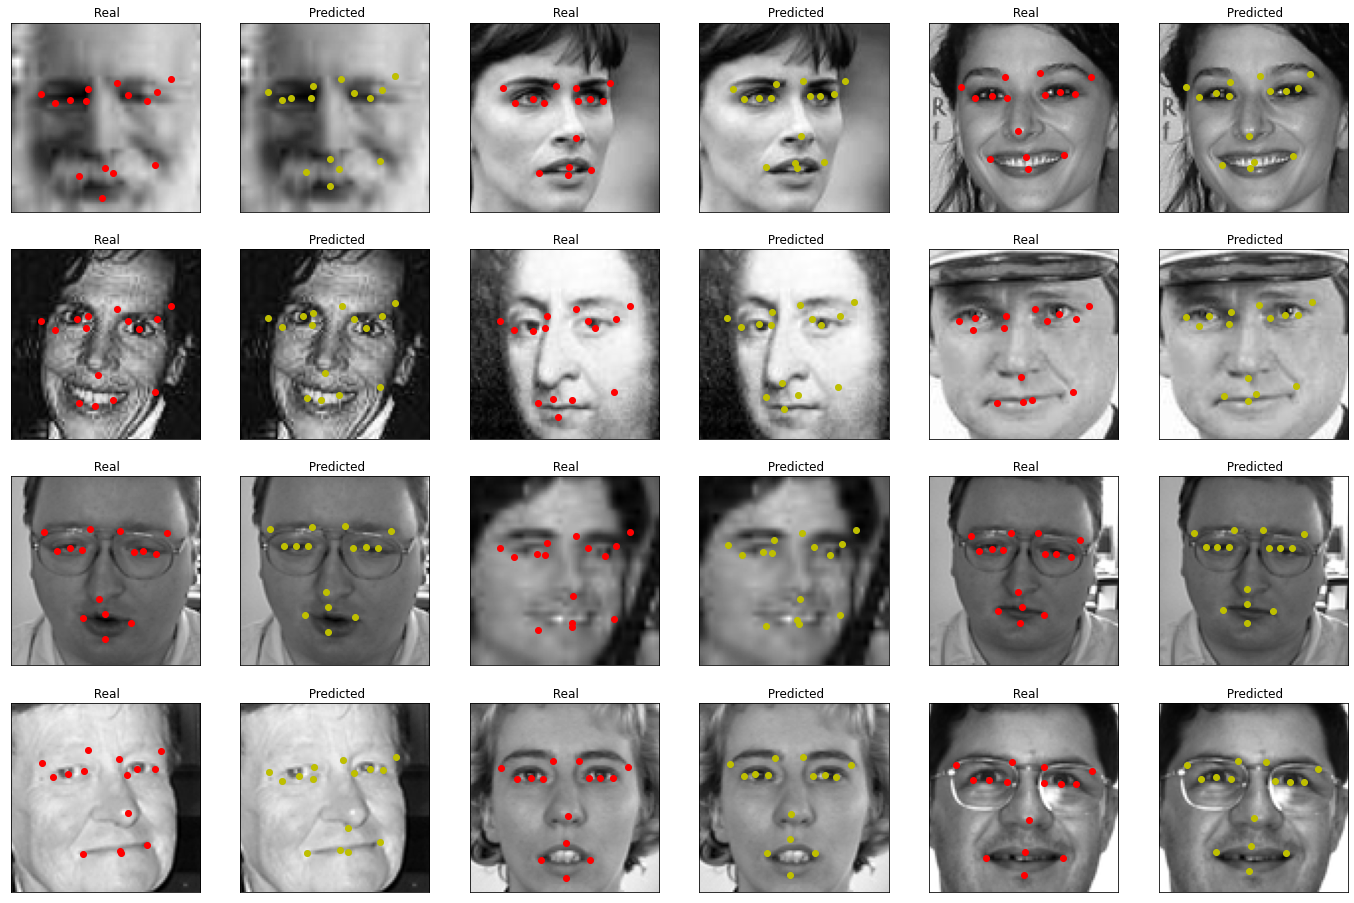

In [ ]:
fig = plt.figure(figsize=(24,16))
for i in range(12):
    axis = fig.add_subplot(4, 6, i*2+1, xticks=[], yticks=[])
    plot_keypoints(images_val[i], labels_val[i], axis, False)
    axis = fig.add_subplot(4, 6, i*2+2, xticks=[], yticks=[])
    plot_keypoints(images_val[i], test_preds[i], axis, True)
plt.show()

## **Augmentation**

In [ ]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin, cos
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.constraints import maxnorm
from keras.optimizers import SGD

# plot keypoints on the image
def plot_keypoints(image, keypoint, axis, col, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.plot(keypoint[0::2], keypoint[1::2], col)
    plt.title(title)


# check null and remove them
def null_remove(train_data):
    # check null values
    print('\nCount the null value in the train data: ')
    print(train_data.isnull().any().describe())

    # drop the na value
    train_data = train_data.dropna()
    print('\nAfter dropping the null value, Count the null value in the train data: ')
    print(train_data.isnull().any().describe())

    print('\nCount the null value in the test data: ')
    print(test_data.isnull().any().describe())
    print('\nCount the null value in the ID Lookup Table: ')
    print(IdLookupTable.isnull().any().describe())
    return train_data

def fill_null(train_data):
    return  train_data.fillna(method = 'ffill')

# create a cnn model
def cnn_model(epochs):
    # Create the model
    model = Sequential()

    # Input dimensions: (None, 96, 96, 1)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 96, 96, 32)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 48, 48, 32)
    model.add(Convolution2D(4, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 48, 48, 64)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 24, 24, 64)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 24, 24, 96)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 12, 12, 96)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 12, 12, 128)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 6, 6, 128)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 6, 6, 256)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 3, 3, 256)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 3, 3, 512)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    # Input dimensions: (None, 3, 3, 512)
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30))
    model.summary()
    lrate = 0.01
    decay = lrate / epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    # model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    return model

def split_images(train_data):
    images = []
    for idx, sample in train_data.iterrows():
        image = np.array(sample['Image'].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255.
    return images

def split_keypoints(train_data):
    keypoint_data = train_data.drop('Image',axis = 1)
    keypoint_features = []
    for idx, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    keypoint_features = np.array(keypoint_features, dtype = 'float')
    return keypoint_features


# Load data
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
IdLookupTable = pd.read_csv('IdLookupTable.csv')

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# remove null values
noNull_train_data = null_remove(train_data)
noNull_test_data = null_remove(test_data)
withNull_train_data = fill_null(train_data)

# split data
clean_images = split_images(noNull_train_data)
clean_keypoint = split_keypoints(noNull_train_data)
clean_test_images = split_images(noNull_test_data)
clean_test_keypoint = split_keypoints(noNull_test_data)

clean_images, images_val, clean_keypoint, labels_val = 
train_test_split(clean_images, clean_keypoint, random_state=42, test_size=.2)

# Explore data
print('The shape of clean image data : ', clean_images.shape)
print('The shape of clean keypoint data : ', clean_keypoint.shape)
print('The shape of clean test data : ', test_data.shape)
print('The shape of clean train data : ', train_data.shape)
print('The shape of clean test data : ', test_data.shape)


Count the null value in the train data: 
count       31
unique       2
top       True
freq        28
dtype: object

After dropping the null value, Count the null value in the train data: 
count        31
unique        1
top       False
freq         31
dtype: object

Count the null value in the test data: 
count         2
unique        1
top       False
freq          2
dtype: object

Count the null value in the ID Lookup Table: 
count         4
unique        2
top       False
freq          3
dtype: object

Count the null value in the train data: 
count         2
unique        1
top       False
freq          2
dtype: object

After dropping the null value, Count the null value in the train data: 
count         2
unique        1
top       False
freq          2
dtype: object

Count the null value in the test data: 
count         2
unique        1
top       False
freq          2
dtype: object

Count the null value in the ID Lookup Table: 
count         4
unique        2
top       False
freq

In [ ]:
sample_image_index = 20
shift_augmentation = 1
rotation_augmentation = 1
random_noise_augmentation = 1
horizontal_flips = 1
train_images = clean_images
train_keypoints = clean_keypoint

Augmentation by shifting the image

Shape of shifted_train_images: (12201, 96, 96, 1)
Shape of shifted_train_keypoints: (12201, 30)


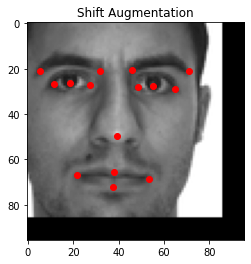

In [ ]:
def shift_images(images, keypoints):
    shifted_images = []
    shifted_keypoints = []
    for shift in [10]:    # Augmenting over several pixel shift values
        for (shift_x,shift_y) in [(-shift,-shift),(-shift,shift),(shift,-shift),(shift,shift),(0,-shift),(0,shift),(shift,0),(-shift,0)]:
            M = np.float32([[1,0,shift_x],[0,1,shift_y]])
            for image, keypoint in zip(images, keypoints):
                shifted_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                shifted_keypoint = np.array([(point+shift_x) if idx%2==0 else (point+shift_y) for idx, point in enumerate(keypoint)])
                if np.all(0.0<shifted_keypoint) and np.all(shifted_keypoint<96.0):
                    shifted_images.append(shifted_image.reshape(96,96,1))
                    shifted_keypoints.append(shifted_keypoint)
    shifted_keypoints = np.clip(shifted_keypoints,0.0,96.0)
    return shifted_images, shifted_keypoints

if shift_augmentation:
    shifted_train_images, shifted_train_keypoints = shift_images(clean_images, clean_keypoint)
    print(f"Shape of shifted_train_images: {np.shape(shifted_train_images)}")
    print(f"Shape of shifted_train_keypoints: {np.shape(shifted_train_keypoints)}")
    train_images = np.concatenate((train_images, shifted_train_images))
    train_keypoints = np.concatenate((train_keypoints, shifted_train_keypoints))
    fig, axis = plt.subplots()
    plot_keypoints(shifted_train_images[sample_image_index], shifted_train_keypoints[sample_image_index], axis,'ro', "Shift Augmentation")

Augmentation by flip

Shape of flipped_train_images: (13913, 96, 96, 1)
Shape of flipped_train_keypoints: (13913, 30)


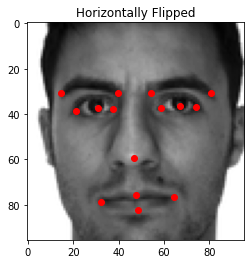

In [ ]:
def horizontal_flip(images, keypoints):
    flipped_keypoints = []
    flipped_images = np.flip(images, axis=2)   # Flip column-wise (axis=2)
    for idx, sample_keypoints in enumerate(keypoints):
        # Subtract only X co-ordinates of keypoints from 96 for horizontal flipping
        flipped_keypoints.append([96.-coor if idx%2==0 else coor for idx,coor in enumerate(sample_keypoints)])    
    return flipped_images, flipped_keypoints

if horizontal_flips:
    flipped_train_images, flipped_train_keypoints = horizontal_flip(train_images, train_keypoints)
    print("Shape of flipped_train_images: {}".format(np.shape(flipped_train_images)))
    print("Shape of flipped_train_keypoints: {}".format(np.shape(flipped_train_keypoints)))
    train_images = np.concatenate((train_images, flipped_train_images))
    train_keypoints = np.concatenate((train_keypoints, flipped_train_keypoints))
    fig, axis = plt.subplots()
    plot_keypoints(flipped_train_images[sample_image_index], flipped_train_keypoints[sample_image_index], axis,'ro', "Horizontally Flipped")

Augmentation by Rotation

Augmenting for angles (in degrees): 
15  -15  
Shape of rotated_train_images: (55652, 96, 96, 1)
Shape of rotated_train_keypoints: (55652, 30)



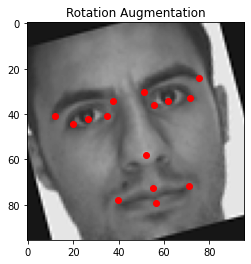

In [ ]:
def rotate_augmentation(images, keypoints):
    rotated_images = []
    rotated_keypoints = []
    print("Augmenting for angles (in degrees): ")
    for angle in rotation_angles:    # Rotation augmentation for a list of angle values
        for angle in [angle,-angle]:
            print(f'{angle}', end='  ')
            M = cv2.getRotationMatrix2D((48,48), angle, 1.0)
            # Obtain angle in radians from angle in degrees (notice negative sign for change in clockwise vs anti-clockwise 
            #directions from conventional rotation to cv2's image rotation)
            angle_rad = -angle*pi/180.     
            # For train_images
            for image in images:
                rotated_image = cv2.warpAffine(image, M, (96,96), flags=cv2.INTER_CUBIC)
                rotated_images.append(rotated_image)
            # For train_keypoints
            for keypoint in keypoints:
                rotated_keypoint = keypoint - 48.    # Subtract the middle value of the image dimension
                for idx in range(0,len(rotated_keypoint),2):
                    rotated_keypoint[idx] = rotated_keypoint[idx]*cos(angle_rad)-rotated_keypoint[idx+1]*sin(angle_rad)
                    rotated_keypoint[idx+1] = rotated_keypoint[idx]*sin(angle_rad)+rotated_keypoint[idx+1]*cos(angle_rad)
                rotated_keypoint += 48.   # Add the earlier subtracted value
                rotated_keypoints.append(rotated_keypoint)
            
    return np.reshape(rotated_images,(-1,96,96,1)), rotated_keypoints

if rotation_augmentation:
    rotation_angles = [15]
    rotated_train_images, rotated_train_keypoints = rotate_augmentation(train_images, train_keypoints)
    print("\nShape of rotated_train_images: {}".format(np.shape(rotated_train_images)))
    print("Shape of rotated_train_keypoints: {}\n".format(np.shape(rotated_train_keypoints)))
    train_images = np.concatenate((train_images, rotated_train_images))
    train_keypoints = np.concatenate((train_keypoints, rotated_train_keypoints))
    fig, axis = plt.subplots()
    plot_keypoints(rotated_train_images[sample_image_index], rotated_train_keypoints[sample_image_index], axis, 'ro', "Rotation Augmentation")

Augmentation by Noise

Shape of noisy_train_images: (1712, 96, 96, 1)


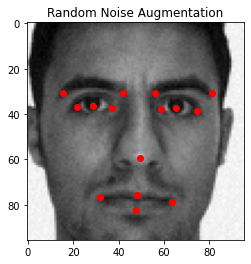

In [ ]:
def add_noise(images):
    noisy_images = []
    for image in images:
        # Adding random normal noise to the input image & clip the resulting noisy image between [-1,1]
        noisy_image = cv2.add(image, 0.015*np.random.randn(96,96,1))    
        noisy_images.append(noisy_image.reshape(96,96,1))
    return noisy_images

if random_noise_augmentation:
    noisy_train_images = add_noise(clean_images)
    print(f"Shape of noisy_train_images: {np.shape(noisy_train_images)}")
    train_images = np.concatenate((train_images, noisy_train_images))
    train_keypoints = np.concatenate((train_keypoints, clean_keypoint))
    fig, axis = plt.subplots()
    plot_keypoints(noisy_train_images[sample_image_index], clean_keypoint[sample_image_index], axis, 'ro', "Random Noise Augmentation")

# Lets train the model on this new augmented dataset.

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 32)       

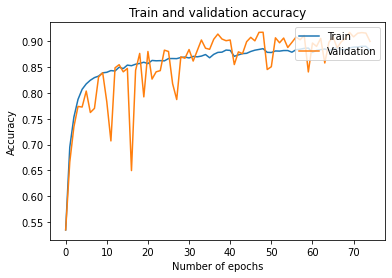

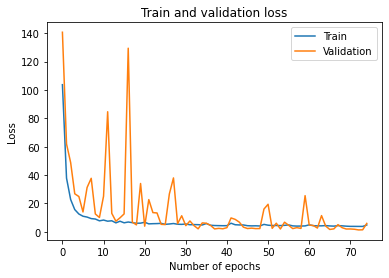

In [ ]:
epochs = 75
batch = 128
model = cnn_model(epochs)
#model = load_model('/content/drive/My Drive/Python_DL/best_model.hdf5')

# Fit the model
checkpointer = ModelCheckpoint(filepath = '/content/drive/My Drive/Python_DL/best_model.hdf5', monitor='mae', verbose=1, save_best_only=True, mode='min')
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'acc'])
history = model.fit(train_images, train_keypoints, epochs=epochs, batch_size=batch, callbacks=[checkpointer], validation_split=0.05)

# Plot the loss and accuracy using history object
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
scores = model.evaluate(train_images, train_keypoints, verbose=0)

print("Accuracy: %.2f%%" % (scores[1] * 100))
print('Loss:', scores[0])

Accuracy: 89.38%
Loss: 2.583604327290953


In [ ]:
model = load_model('/content/drive/My Drive/Python_DL/best_model.hdf5')

# Lets use the model to make some predictions

In [ ]:
# Prediction on unseen dataset
test_preds = model.predict(images_val[25:50])

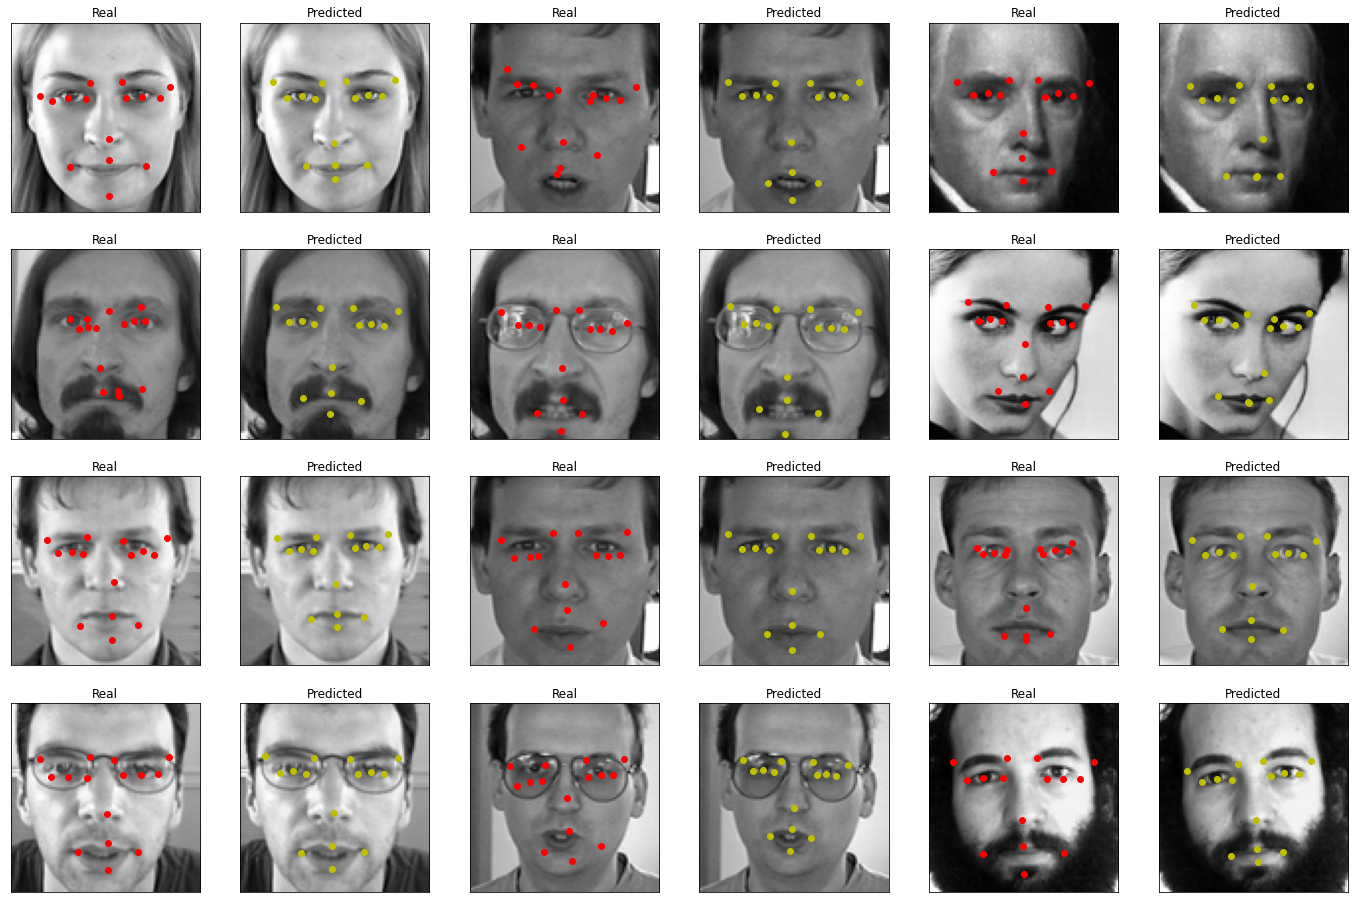

In [ ]:
fig = plt.figure(figsize=(24,16))
for i in range(12):
    axis = fig.add_subplot(4, 6, i*2+1, xticks=[], yticks=[])
    plot_keypoints(images_val[i+25], labels_val[i], axis, 'ro', 'Real')
    axis = fig.add_subplot(4, 6, i*2+2, xticks=[], yticks=[]) 
    plot_keypoints(images_val[i+25], test_preds[i], axis, 'yo', 'Predicted')
plt.show()

In [ ]:
#prediction on test data
test_preds = model.predict(clean_test_images)

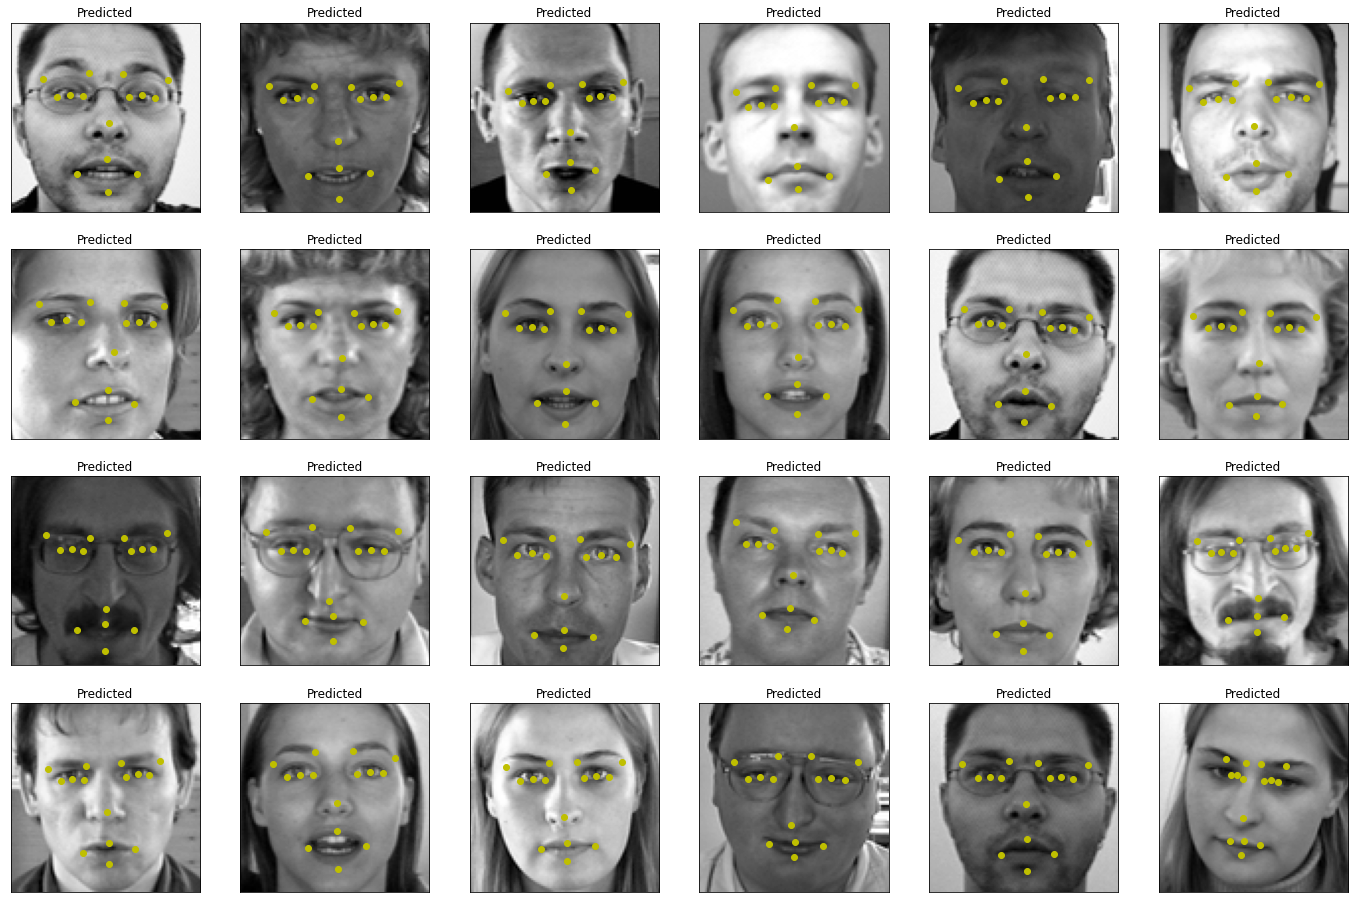

In [ ]:
#prediction on test data
test_preds = model.predict(clean_test_images)

fig = plt.figure(figsize=(24,16))
for i in range(24):
    axis = fig.add_subplot(4, 6, i+1, xticks=[], yticks=[])
    plot_keypoints(clean_test_images[i], test_preds[i], axis, 'yo', 'Predicted')
plt.show()

## **Testing on our own images**

In [ ]:
#load model
from keras.models import load_model
model = load_model('/content/drive/My Drive/Python_DL/best_model.hdf5')

In [ ]:
# plot keypoints on the image
def plot_keypoints(image, keypoint, axis, col, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.plot(keypoint[0::2], keypoint[1::2], col)
    plt.title(title)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

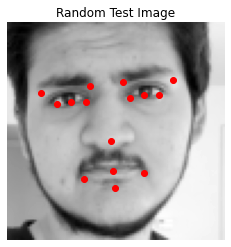

In [ ]:
from matplotlib import image

image = color.rgb2gray(image.imread('face1.png'))
image_resized = resize(image, (96, 96),)
im = np.transpose(np.expand_dims(image_resized, axis=0),(1,2,0))
keypoints = model.predict(np.expand_dims(im, axis=0))
fig, axis = plt.subplots() 
axis.axis('off') 
plot_keypoints(im, keypoints[0], axis, 'ro', "Random Test Image")

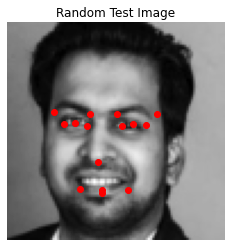

In [ ]:
from matplotlib import image

image = color.rgb2gray(image.imread('face2.png'))
image_resized = resize(image, (96, 96),)
im = np.transpose(np.expand_dims(image_resized, axis=0),(1,2,0))
keypoints = model.predict(np.expand_dims(im, axis=0))
fig, axis = plt.subplots()   
axis.axis('off') 
plot_keypoints(im, keypoints[0], axis, 'ro', "Random Test Image")

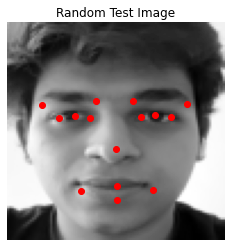

In [ ]:
from matplotlib import image

image = color.rgb2gray(image.imread('face.png'))
image_resized = resize(image, (96, 96),)
im = np.transpose(np.expand_dims(image_resized, axis=0),(1,2,0))
keypoints = model.predict(np.expand_dims(im, axis=0))
fig, axis = plt.subplots()   
axis.axis('off') 
plot_keypoints(im, keypoints[0], axis, 'ro', "Random Test Image")

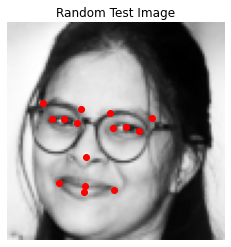

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(image.imread('face3.png'))
image_resized = resize(image, (96, 96),)
im = np.transpose(np.expand_dims(image_resized, axis=0),(1,2,0))
keypoints = model.predict(np.expand_dims(im, axis=0))
fig, axis = plt.subplots()   
axis.axis('off') 
plot_keypoints(im, keypoints[0], axis, 'ro', "Random Test Image")